In [111]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [112]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [113]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(120)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [114]:
# Read the ride data file and store it in a pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12


In [115]:
# find particular value based on row
ride_data_df.iloc[1]['fare']

30.24

In [116]:
#passing_math_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
#                    .count()["student_name"]


# find number of fares in Lake Jonathanshire that are greater than 20
jonathan_greater_than_ten = ride_data_df[(ride_data_df['city'] == 'Lake Jonathanshire') &
                           (ride_data_df['fare'] >= 10.00)].count()['fare']


jonathan_greater_than_ten

23

In [117]:
#just_THS_ninth = student_data_df.loc[(student_data_df["school_name"] == "Thomas High School") 
#                                     & (student_data_df["grade"] == "9th"),['Student ID']].count()

jonathan_greater_than_ten = ride_data_df.loc[(ride_data_df['city'] == 'Lake Jonathanshire') &
                           (ride_data_df['fare'] >= 10.00),['fare']].count()


jonathan_greater_than_ten

fare    23
dtype: int64

In [118]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [119]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [120]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [121]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [122]:
# Get the datatypes of each column in the ride data dataframe
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [123]:
# Get the datatypes for each column in the city data dataframe
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [124]:
# Get the number of uniques for the city data columns
city_data_df['city'].nunique()

120

In [125]:
city_data_df['type'].nunique()

3

In [126]:
city_data_df['driver_count'].nunique()

52

In [127]:
# Get those actual unique values
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [128]:
# Get the number of urban city values
sum(city_data_df['type'] == 'Urban')

66

In [129]:
sum(city_data_df['type'] == 'Suburban')

36

In [130]:
sum(city_data_df['type'] == 'Rural')

18

In [131]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [132]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [133]:
combined_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])

In [134]:
combined_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [176]:
Amandaburgh = combined_df[(combined_df['city'] == 'Amandaburgh')]
Amandaburgh

,city,driver_count,type,date,fare,ride_id
164,Amandaburgh,12,Urban,3/5/19 2:15,26.28,9.068510e+11
235,Amandaburgh,12,Urban,2/24/19 23:10,43.66,6.573820e+12
239,Amandaburgh,12,Urban,2/10/19 20:42,36.17,6.455620e+12
320,Amandaburgh,12,Urban,1/11/19 2:22,29.24,7.279900e+12
454,Amandaburgh,12,Urban,1/21/19 4:12,9.26,5.528430e+12
536,Amandaburgh,12,Urban,4/19/19 16:30,6.27,4.400630e+12
540,Amandaburgh,12,Urban,3/20/19 7:40,27.45,3.701010e+12
654,Amandaburgh,12,Urban,4/1/19 9:24,24.29,1.995460e+12
687,Amandaburgh,12,Urban,4/20/19 2:16,16.27,3.513120e+12
741,Amandaburgh,12,Urban,3/13/19 12:52,13.88,6.222130e+12


In [135]:
combined_df = combined_df[['city', 'driver_count', 'type', 'date', 'fare', 'ride_id']]
combined_df

,city,driver_count,type,date,fare,ride_id
0,Lake Jonathanshire,5,Urban,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,72,Urban,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,57,Urban,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,34,Urban,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,46,Urban,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...,...,...
2370,Michaelberg,6,Rural,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,2,Rural,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,1,Rural,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,4,Rural,5/7/19 19:22,44.94,4.256850e+12


In [136]:
combined_df.rename(columns = {'driver_count':'# drivers'})

,city,# drivers,type,date,fare,ride_id
0,Lake Jonathanshire,5,Urban,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,72,Urban,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,57,Urban,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,34,Urban,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,46,Urban,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...,...,...
2370,Michaelberg,6,Rural,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,2,Rural,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,1,Rural,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,4,Rural,5/7/19 19:22,44.94,4.256850e+12


In [140]:
# Create the Urban city DataFrame.
urban_df = combined_df[combined_df["type"] == "Urban"]
urban_df.head()

,city,driver_count,type,date,fare,ride_id
0,Lake Jonathanshire,5,Urban,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,72,Urban,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,57,Urban,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,34,Urban,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,46,Urban,3/6/19 4:28,34.58,3.908450e+12


In [138]:
# Create the suburban dataframe
suburban_df = combined_df[combined_df["type"] == "Suburban"]
suburban_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Barronchester,11,Suburban,1/27/19 3:08,27.79,6.653620e+12
1626,East Kentstad,20,Suburban,4/7/19 19:44,18.75,6.575960e+12
1627,Lake Omar,22,Suburban,1/17/19 21:33,21.71,9.669120e+11
1628,Myersshire,19,Suburban,2/27/19 17:38,17.10,5.706770e+12
1629,West Hannah,12,Suburban,4/19/19 1:06,37.78,2.273050e+12


In [139]:
# Create the rural dataframe
rural_df = combined_df[combined_df['type'] == 'Rural']
rural_df.head()

,city,driver_count,type,date,fare,ride_id
2250,Randallchester,9,Rural,4/13/19 11:13,43.22,1.076080e+12
2251,North Holly,8,Rural,2/2/19 14:54,12.42,1.985260e+12
2252,Michaelberg,6,Rural,3/27/19 18:27,54.85,4.421840e+12
2253,Lake Latoyabury,2,Rural,2/23/19 21:12,47.90,3.269650e+12
2254,Lake Latoyabury,2,Rural,5/6/19 8:57,51.80,4.018030e+12


In [145]:
# Get the number of rides per urban city. HINT - use the groupby method

#Note that doing the following is like a pivot table within Pandas. The index becomes the cities. 
rides_per_city = urban_df.groupby(['city']).count()
rides_per_city

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Carriemouth,27,27,27,27,27
Christopherfurt,27,27,27,27,27
Deanville,19,19,19,19,19
...,...,...,...,...,...
West Patrickchester,16,16,16,16,16
West Robert,31,31,31,31,31
West Samuelburgh,25,25,25,25,25


In [155]:
# Now use the groupby and append a column name so that you have a just two columns. 
# 1) the cities and 2.) the quantity you want to display per city
# NOTE you don't have to use 'ride_id' at the end. Any column will do

urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [157]:
# Now do the same but for suburbs and rural areas

suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_df.groupby(['city']).count()['ride_id']

In [158]:
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [159]:
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [160]:
# Now get the avg fare per area type: urban, suburban and rural

avg_urban_fare = urban_df.groupby(['city']).mean()['fare']
avg_urban_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [162]:
avg_suburban_fare = suburban_df.groupby(['city']).mean()['fare']
avg_suburban_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [163]:
avg_rural_fare = rural_df.groupby(['city']).mean()['fare']
avg_rural_fare.head(10)

city
Bradshawfurt       40.064000
Garzaport          24.123333
Harringtonfort     33.470000
Jessicaport        36.013333
Lake Jamie         34.358333
Lake Latoyabury    26.061818
Michaelberg        34.997500
New Ryantown       43.278333
Newtonview         36.745000
North Holly        29.130000
Name: fare, dtype: float64

In [187]:
# get avg number of drivers for each urban, suburban and rural area. 

urban_drivers = urban_df.groupby(['city']).mean()['driver_count']
suburban_drivers = suburban_df.groupby(['city']).mean()['driver_count']
rural_drivers = rural_df.groupby(['city']).mean()['driver_count']
urban_drivers.head(66)

city
Amandaburgh            12
Barajasview            26
Carriemouth            52
Christopherfurt        41
Deanville              49
                       ..
West Patrickchester    25
West Robert            39
West Samuelburgh       73
Williamsstad           59
Williamsview           46
Name: driver_count, Length: 66, dtype: int64

# Create the bubble charts

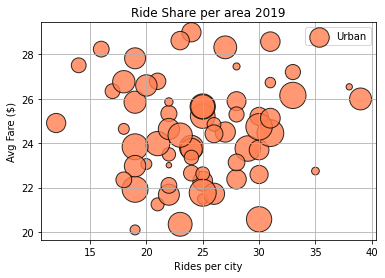

In [205]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            avg_urban_fare,
            s=10*urban_drivers,
            c='coral',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('Ride Share per area 2019')
plt.ylabel('Avg Fare ($)')
plt.xlabel('Rides per city')
plt.grid()
plt.legend()

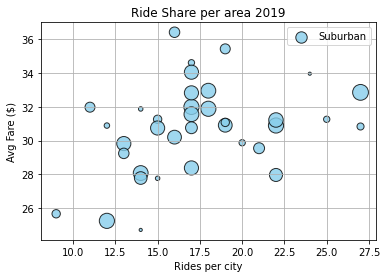

In [206]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            avg_suburban_fare,
            s=10*suburban_drivers,
            c='skyblue',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Suburban')
plt.title('Ride Share per area 2019')
plt.ylabel('Avg Fare ($)')
plt.xlabel('Rides per city')
plt.grid()
plt.legend()

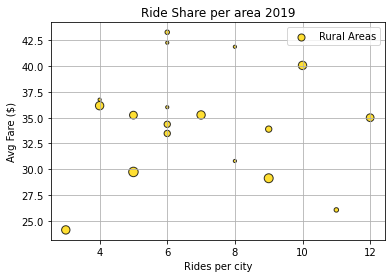

In [209]:
# build the scatterplot for rural areas

plt.scatter(rural_ride_count, 
            avg_rural_fare,
            s=10*rural_drivers,
            c='gold',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Rural Areas')
plt.title('Ride Share per area 2019')
plt.ylabel('Avg Fare ($)')
plt.xlabel('Rides per city')
plt.grid()
plt.legend()

# Combine all three into one scatterplot

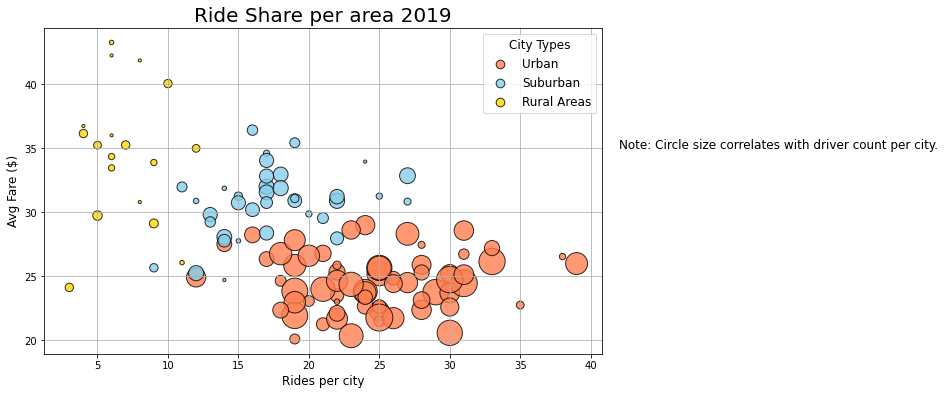

In [217]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, 
            avg_urban_fare,
            s=10*urban_drivers,
            c='coral',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Urban')

plt.scatter(suburban_ride_count, 
            avg_suburban_fare,
            s=10*suburban_drivers,
            c='skyblue',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Suburban')

plt.scatter(rural_ride_count, 
            avg_rural_fare,
            s=10*rural_drivers,
            c='gold',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Rural Areas')

plt.title('Ride Share per area 2019', fontsize=20)
plt.ylabel('Avg Fare ($)', fontsize=12)
plt.xlabel('Rides per city', fontsize=12)
plt.grid()
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Resources/Fig1.png")

plt.show()